<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Hadamard Action: An Introduction to Quantum Circuitry
## 2018 submission for the *Teach Me QISKit* Tutorial Competition

### Contributors

Connor Fieweger

Contents:
    * Introduction
        i) Problem of interest
            - Reading a Circuit Diagram
        ii) Theory
    1. Approach 1
    2. Approach 2
    3. Approach 3
    * Appendix: Further Materials

# Introduction:
   The following jupyter notebook presents three different
    approaches to solving the same simple yet clever quantum
    computational exercise that demonstrates the flow of
    information through a quantum logic machine. By solving
    this same problem through several different means, the notebook
    aims to teach an understanding of evaluating circuit diagrams that
    does not depend on only one method of interpretation. Rather, 
    the reader will find that there are multiple modes of understanding 
    quantum information processing and quantum circuity, including
    those that use classical computation to assist in interfacing
    with quantum information -- in particular the Qiskit library.
    Seeing the same problem worked in parallel both with and without 
    the Qiskit library aims to show its benefit and develop a working knowledge 
    of the library basics in preparation for more detailed tutorials such
    as those provided by IBM on the Qiskit GitHub.

## i) Problem of interest

The exercise undertaken in the following notebooks is to show that the following two quantum
circuits are equivalent:

<img src="images/hadamard_action.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="750 px" align="left">

To a quantum information scientist, this ought to be seen as a clever result that demonstrates 
the interesting way in which quantum logic machines operate. To anyone else, it probably doesn't mean much -- you may not even know what the drawings mean, so I'll entertain a more detailed breakdown in order to address this focus topic of reading quantum circuit diagrams.

In addition, for those without background in quantum computation at all but are here because they are interested in entering the field, a brief introduction (this indented section can be skipped by those already familiar with the concept of quantum computation)

- Similarly to classical computers, quantum computers operate by performing logic operations on the elements of a 'register', or a bank of objects that can store information. In a classical computer, these are called 'bits', and they can store information by being either in either an 'off' or an 'on' state (0 or 1, respectively)\*. The computations allowed/enabled by objects that store information in this binary way are a result of the family of binary logic operations called 'Boolean algebra', and these computations are performed by the familiar computers we have all around us today. This algebra of binary operations, however, has certain shortcomings in terms of ability to solve certain problems as a result of physical constraints on the bits -- perhaps a computation requires so many bits that to build a big enough register in the real world would be impossible, or perhaps the computation takes a certain amount of time to perform on a bit, and as the number of bits increases the required computation time is unreasonable for practice. Some of these problems, however, are more tractable when one stores the information differently -- i.e. we are not limited by the characteristcs of binary logic if the information is stored in something other than a binary. This is exactly what a quantum computer does. Rather than storing our information in a binary bit object, we can store it as a *vector*, which follows logic operations according to the family of operations called vector algebra. The vector nature of the object naturally invites physical objects whose properties are described by quantum mechanics (qubits) as the physical object to store the information in, since quantum states are also vectors and therefore support computational realization of vector algebra operations. One particular advantage of vectors stored as quantum objects is that the qubits can be in superpositions of states -- in either an 'off' *and* an 'on' state (called |0> and |1>, respectively)\*. This method of storing information is not the best for all computations, in which case classical is usually favorable due to relative technical ease, but for the computations classical computers cannot achieve, quantum computers have often been shown to overcome the computational expense.

    A famous example is RSA-encryption, a common cryptographic method that relies on the fact that one of those problems that classical computers have trouble with is factoring large numbers that are the product of two prime numbers. Since this impossibility was thought of as a constant for contemporary computers, it is used to secure information away from those who do not already know the prime factors. Quantum computation received a lot of research attention when a theorist found that a quantum logic machine could use the advantages of vector algebra to compute these primes, rendering what was thought to be one of the strongest possible and practically ubiquitous encryption techniques critically vulnerable if a quantum computer were to ever be built. This reality of such a machine was far away at the time of the theoretical result due to the difficulty in engineering precise control over quantum objects, but as technology becomes ever-more sophisticated, the research community is working towards a point where such a quantum machine is physically realizable, making quantum computation even more relevant. While the circuit diagram for this encryption-breaking computation (called Shor's algorithm) is far more complicated than the one presented here, it is read in more or less the same way, and so this simple example is a good starting point for teaching how to read quantum circuits while still demostrating a uniquely quantum logic result.

\* *Note: while it may be a bit aphoristic, this difference of either/or vs. either/and is really the fundamental difference between classical and quantum logic machines.*

### Reading a circuit diagram:
In order to represent a quantum logic operation, one often draws a 'quantum circuit diagram', which lays out the qubits and order of operations on the qubits pictorially. The circuit is read from left-to-right chronologically, i.e. operations futher to the left happen to the qubits first. Each quantum circuit has a store of qubits, called the quantum register, for performing operations on. Each qubit as it moves from left to right through the circuit is represented by a horizontal line (called a 'wire') with the label of the qubit on the edges of the circuit next to its wire (with $\left|\psi\right>$ being a common character to label a qubit since it has history in quantum mechanics literature). The qubits are ordered top-down, i.e. the first qubit is the topmost line, the second qubit is the second from the top, and so on. The state of the *entire* register is written as the tensor product state of the vector qubits that make up the register.

[NOTE: there are two possible conventions for writing the product state -- the first follows the usual tensor product convention of writing elements  left-to-right: 

$\Psi_\rightarrow = \left|\psi_1\right> \otimes \left|\psi_2\right> \otimes ... \otimes \left|\psi_n\right> = \left|\psi_1\psi_2 ... \psi_n\right>$ , 
where this is the common convention used in quantum computation literature

while the second follows the classical bit register convention of reading bits from right-to-left\*: $\Psi_\leftarrow = \left|\psi_1\right> \otimes \left|\psi_2\right> \otimes ... \otimes \left|\psi_n\right> = \left|\psi_n ... \psi_2\psi_1 \right>$ , where this is a convention used in documentation for quantum programming that interfaces with classical registers (such as in the IBM Qiskit library)]

Symbols placed along each wire are called 'gates' and represent operations to be performed on that wire's qubit, and these are what allow the machine to perform computations. There are many types of gate operator that can be applied to a qubit object due to the object's vector properties, and so those who are interested are invited to read into the provided further literature as well as the wikipedia page for quantum gates: https://en.wikipedia.org/wiki/Quantum_logic_gate. For the computations performed in these notebooks, we'll need to understand the X gate, the controlled-not (CNOT) gate, the Hadamard gate, and the measurement gate, so those will be explained in some more detail.

\* * this is a result of the convention established in binary number representation (e.g. (011 = 4(0) + 2(1) + 1(1) = 3) - the first bit in the classical register corresponds to the lowest place value, and so it is written on the right)*

 - X gate: the X gate in quantum computation is equivalent to the 'NOT' gate, or 'bit-flip' operation, in classical computing. Any qubit in the state $\left|0\right>$ is flipped to become a $\left|1\right>$ and qubits in the state $\left|1\right>$ are flipped to $\left|0\right>$. The X gate is represented as a box with an 'X' on it.
 - CNOT: a controlled version of the X gate in that the gate is only applied to the target qubit if the control qubit of the gate is 'on', i.e. in the state $\left|1\right>$. The CNOT gate is represented by a dot on the control line connected to a plus circumscribed by a circle on the subject line, with the plussed circle sometimes being replaced by the X gate symbol since they are equivalent. This is one of the most important gates in building quantum logic machines because of the imperative if-this-then-that logic of the gate allowing for conditional evaluations.
 - Hadamard: So far, it has been said that qubits can exist in states known as $\left|0\right>$,$\left|1\right>$. Additionally, due to their vector nature and ability to superpose, they can exist in another set of states known as $\left|+\right>$,$\left|-\right>$. The Hadamard gate is a uniquely quantum gate that serves to switch the qubits between these sets of states (with each of the sets being known as a 'basis'). The effect of the  hadamard gate is such that ($\left|0\right>$ is changed to $\left|+\right>$ and $\left|+\right>$ is changed to $\left|0\right>$) and ($\left|1\right>$ is changed to $\left|-\right>$ and $\left|-\right>$ is changed to $\left|1\right>$). The Hadamard is represented by a box with an 'H' on it.
 - Measurement: As described, qubits have an either/and behavior of superposition. Those familiar with quantum mechanics or even just the Schrödinger's cat thought experiment know, however, that this is only when we do not observe the qubit state. When we do, it will 'collapse' down and be fixed to one of the constituent states of the full superposition in the basis of the measurement made (i.e. we must choose to either check either in terms of $\left|0\right>$,$\left|1\right>$ or in terms of $\left|+\right>$,$\left|-\right>$). In quantum computation, one usually measures in terms of $\left|0\right>$,$\left|1\right>$, and so this is called the 'computational basis' (and +- is then called the 'Hadamard basis'). After the measurement is made, the result of collapsing the state in this particular instance can be written onto a classical ancilla\* bit to store the information, where finding that the qubit is in the state $\left|0\right>$ after measurement is written to the classical bit as 0 and finding that the qubit is in the state $\left|1\right>$ after measurement is written to the classical bit as 1. Measurement is usually represented as a box with a gauge and an 'M' drawn on it with a line connecting the box to its classical ancilla bit.
 
\* * ancilla is just a fancy latin word meaning 'helper' or 'slave' that is used in computing literature to describe bits that do not directly participate in a computation but are used to facilitate it. It's a common concept in quantum computation, so it's worth learning.*

With the behavior of the gates broken down as such, all that remains is to apply the gates to the qubits and then measure the final state. If the final states are the same for both, then they're equivalent circuits. Well, easier said than done -- even for a two-qubit, 3-gate set circuit such as ii) this can get tenuous, especially if one chooses to fully write out the quantum circuit state by hand. The advantages offered by a library designed for performing quantum information operations quickly become obvious when considering more complicated/useful circuits, with the usefuls ones often exceding a classical computer's capabilities and requiring implementation on actual quantum circuits.

## b) Theory for each notebook

### Approach 1

Most of the the theory for notebook 1 is contained within section a) on reading circuit diagrams. One point, however, ought to be further explained, and this is the action of the Hadamard gate. As said before, this is the action of switching between the $\left|0\right>\left|1\right>$ basis and the $\left|+\right>\left|-\right>$ basis. The precise conversion between these states is: 

$$\left|+\right> = \frac{1}{\sqrt{2}}(\left|0\right> + \left|1\right>) \\ \left|-\right> = \frac{1}{\sqrt{2}}(\left|0\right> - \left|1\right>)$$ 

The Hadamard thus serves to generate the either/and property of a quantum logic machine (in that a $\left|+\right>$ is either a $\left|0\right>$ and a $\left|1\right>$, and so forth). Indeed, this action of the Hadamard is often a key first step of a quantum algorithm because it generates such superpositions to then make logic operations with.

### Approach 2

Notebook 2 uses the formalism of linear algebra to represent the qubit states as column vectors and the gate operations as matrices. In these terms, the states $\left|0\right>,\left|1\right>$ are given by: 
$$ \left|0\right> = \left(\begin{array}{c} 1 \\ 0 \end{array}\right) $$

$$ \left|1\right> = \left(\begin{array}{c} 0 \\ 1 \end{array}\right) $$

and the states $\left|+\right>\left|-\right>$ are given by:

$$ \left|+\right> = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right) $$

$$ \left|-\right> = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right) $$

*Note: from these representations, one can easily see the validity of the conversion between bases provided in the Approach 1 section above.*

The tensor product between 2 vectors of length 2 is a vector of length 4 with elements following the pattern:

$$ \left|n\right> = \left(\begin{array}{c} a \\ b \end{array}\right) $$

$$ \left|m\right> = \left(\begin{array}{c} c \\ d \end{array}\right) $$

$$ \left|n\right> \otimes \left|m\right> = \left(\begin{array}{c} ac \\ ad \\ bc \\ bd \end{array}\right) $$

for $\left|00\right>$, then, we have:
$$\left|00\right> = \left(\begin{array}{c}
        1 \\
        0 \\
        0 \\
        0
\end{array}\right)$$
$$\left|01\right> = \left(\begin{array}{c}
        0 \\
        1 \\
        0 \\
        0
\end{array}\right)$$
$$\left|10\right> = \left(\begin{array}{c}
        0 \\
        0 \\
        1 \\
        0
\end{array}\right)$$
$$\left|11\right> = \left(\begin{array}{c}
        0 \\
        0 \\
        0 \\
        1
\end{array}\right)$$

as stated in the notebook.

Just as the qubit states are represented by column vectors, the gates as they operate on these qubit column vectors are linear operators as represented by matrices. The effect of the matrix ought to be such that it follows the defining logic of the gate -- i.e. the X gate matrix sends the column vector representation of $\left|0\right>$ to the column vector representation of $\left|1\right>$, the H gate sends the column vector representation of $\left|0\right>$ to the column vector representation of $\left|+\right>$, and so on. The matrices employed are H and CNOT (controlled either by line 1 or 2), so lets find the matrices that satisfy this quality of fulfilling the defining action of the gate of interest.

   - H: Building up from the defining logic, we need:
    $$ H\left|0\right> = \left|+\right>, \ H\left|1\right> = \left|-\right> $$
    This is satisfied by a matrix of the form:
    $$ H = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right]$$
    Where this has been constructed by assigning each initial state to a column and writing out the target state column vector in this position -- i.e. the column vector for $\left|+\right>$ occupies column 1, which corresponds to $\left|0\right>$, and the column vector $\left|-\right>$ occupies column 2, which corresponds to $\left|1\right>$.
    Just to check,
    $$ H\left|0\right> = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right] \left(\begin{array}{c} 1 \\ 0 \end{array}\right) = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right) = \left|+\right> \checkmark $$
    $$ H\left|1\right> = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right] \left(\begin{array}{c} 0 \\ 1 \end{array}\right) = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right) = \left|-\right> \checkmark $$
    
    Now, we're often going to be applying multiple H gates in parallel to the product state that represents the full n-qubit quantum register state, so to expand this 2 x 2 matrix to a 2n x 2n matrix (referred to as $H^{\otimes n}$) would allow for applying all the parallel H gates simultaneously to the product state of n qubits. Similar to how the product state for the column vectors is formed, one can do this by taking tensor products of the H gate n times. The tensor product for matrices is executed representationally by embedding the second matrix into the first, i.e.: 
    
    $$ H \otimes H = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right] \otimes H = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 \cdot H & 1 \cdot H \\ 1 \cdot H & -1 \cdot H \end{array}\right] = \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 \cdot \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right] & 1 \cdot \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right]  \\ 1 \cdot \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right] & -1 \cdot \frac{1}{\sqrt{2}}\left[\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right] \end{array}\right] = \frac{1}{2}\left[\begin{array}{cccc}
        1 & 1 & 1 & 1 \\
        1 & -1 & 1 & -1 \\
        1 & 1 & -1 & -1 \\
        1 & -1 & -1 & 1
\end{array}\right]$$
  - CNOT_1: A CNOT gate controlled by line one has the action of flipping the second bit only if the first bit is |1>. This is satisfied by a matrix of the form:
  
  $$CNOT_1 = \left[\begin{array}{cccc}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
\end{array}\right]$$

    where the fulfilment of the $CNOT_1$ definition can be checked through writing out the application of this matrix onto each state. This matrix was formed in a manner similar to the method for H, where the column vector representation of the final state is written in the column corresponding to the initial state following the defining logic of the $CNOT_1$ gate. The convention is to assign the initial state 00 to column 1, 01 to 2, 10 to 3, and 11 to 4.
    - CNOT_2: A CNOT gate controlled by line two has the action of flipping the first bit only if the second bit is |1>. This is satisfied by a matrix of the form:
    
  $$CNOT_2 = \left[\begin{array}{cccc}
        1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0
\end{array}\right]$$

    where the fulfilment of the $CNOT_2$ definition can be checked through writing out  the application of this matrix onto each state. This matrix was formed in a manner similar to the method for H, where the column vector representation of the final state is written in the column corresponding to the initial state following the defining logic of the $CNOT_2$ gate. The convention is to assign the initial state 00 to column 1, 01 to 2, 10 to 3, and 11 to 4.

### Approach 3

The background required for notebook 3 really isn't theory but rather a familiarity with the object-oriented paradigm in Python and the actual Qiskit files. The former is assumed to be known to some degree by the reader given that the audience is programmers looking into quantum information processing libraries. For the latter, readers are strongly encouraged to look through these files, as this is a necessary and unavoidable step to working with just about any API. The notebook introduces the reader to some of these files as well through making a few common, but essential operations in Qiskit by providing sample code that solves the presented problem. With a solution that is already known from the previous two notebooks, one can focus on the library's implementation rather than finding the solution. The problem is short enough such that the reader hopefully doesn't feel overwhelmed by a true quantum algorithm (which are often hefty to digest) and instead clearly sees how quantum circuit diagrams can be realized as Qiskit programs.

# Exercise Solutions:

# Approach 1

<img src="images/hadamard_action.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="750 px" align="left">

In order to show the equivalence of the above circuits, first we'll take the most tedious route of simply writing out the full state after each set of gates and comparing the final states of each circuit. One should note that this method doesn't use any abstraction or coding, rather we simply act as a quantum computer by hand by applying the defining logic of the gates to the input states as one reads the circuit from left to right. This gets a bit clunky even for a fairly simple circuit such as ii), showing the amount of effort this method would require when considering circuits complex enough to execute quantum algorithms worth executing. 

## Circuit i)
For i), the initial state of the input is represented by the tensor product of the two input qubits in the initial register. This is given by:

$$\left|\Psi\right> = \left|\psi_1\right> \otimes \left|\psi_2\right> = \left|\psi_1\psi_2\right>$$

Where each $\left|\psi\right>$ can be either $\left|0\right>$ or $\left|1\right>$

This results in the following set of possible input states for $\left|\Psi\right>: [\left|00\right>, \left|01\right>, \left|10\right>, \left|11\right>]$. The action of the CNOT gate controlled by line 1 is such that the second qubit is 'flipped' (i.e. $\left|0\right>$ becomes $\left|1\right>$ and $\left|1\right>$ becomes $\left|0\right>$) if the first qubit is in the state $\left|1\right>$. This logic gate of 'if-this-then-that' is what makes the CNOT gate absolutely essential to building any quantum logic machine just as it is to building a classical logic machine, only in the classical case the imperative 'if' of 'if-this-then-that' must evaluate to a certainty while in the quantum case it need not. 

Applying the logic of CNOT to our initial possible register states ($\left|\Psi\right>= [\left|00\right>, \left|01\right>, \left|10\right>, \left|11\right>]$, the state after CNOT is found to be

($\left|\Psi'\right>= [\left|00\right>, \left|01\right>, \left|11\right>, \left|10\right>]$). This is then the final state of circuit i).

## Circuit ii)
For ii), this process of writing out the state after each set of gates is as follows (and gets notably lengthy):

The initial state $\left|\Psi\right>$ is given as explained before by ($\left|\Psi\right> = [\left|00\right>, \left|01\right>, \left|10\right>, \left|11\right>]$). The first set of gates is the Hadamard gate, which has the logic of 0 becomes a + and 1 becomes a -. Applying this logic to the initial state gives the state immediately after the first set of Hadamards and immediately before the CNOT, let's call this state $\left|\Psi_1\right>$. Computing by hand, we find:

$(\left|\Psi\right>) \rightarrow (\left|\Psi_1\right> = [\left|++\right>,\left|+-\right>,\left|-+\right>,\left|--\right>])$

The next set of gates to consider is the CNOT controlled by line 2. Similar to the CNOT controlled by line 1, the action is such that the subject line qubit is flipped if the control line qubit is in the state 1. Wait a second, though... isn't our current state $\Psi_1$ before the CNOT in terms of $\left|+\right>$ and $\left|-\right>$? In order to understand exactly the effect of this gate's logic, then, we need to write the $\left|+\right>$ and $\left|-\right>$ in terms of $\left|0\right>$ and $\left|1\right>$. This is given by: $\left|+\right> = \frac{1}{\sqrt{2}}(\left|0\right> + \left|1\right>)$ and $\left|-\right> = \frac{1}{\sqrt{2}}(\left|0\right> - \left|1\right>)$ [see appendix notebook]. 

Again computing by hand, the possible $\left|\Psi_1\right>$ in terms of 0s and 1s is $\left|\Psi_1\right>_{0,1} = \frac{1}{2}[(\left|0\right>+\left|1\right>)(\left|0\right>+\left|1\right>),(\left|0\right>+\left|1\right>)(\left|0\right>-\left|1\right>),(\left|0\right>-\left|1\right>)(\left|0\right>+\left|1\right>),(\left|0\right>-\left|1\right>)(\left|0\right>-\left|1\right>)]$. 

The terms in parenthesis can then be factored into product-states through taking tensor products: $\left|\Psi_1\right> = \frac{1}{2}[(\left|00\right>+\left|01\right>+\left|10\right>+\left|11\right>), (\left|00\right>-\left|01\right>+\left|10\right>-\left|11\right>) , (\left|00\right>+\left|01\right>-\left|10\right>+\left|11\right>), (\left|00\right>-\left|01\right>-\left|10\right>+\left|11\right>)$

There we go, the action of the line-2-controlled CNOT is clearer when we write out $\Psi_1$ in this form: any $\left|XX \right>$ terms that have a 1 in the 2nd spot will have the qubit in the 1st spot flip. Applying this logic, we get the state right after the CNOT gate and right before the second set of Hadamards, lets call it '$\Psi_2$'.

$\left|\Psi_2\right> = \frac{1}{2}[(\left|00\right>+\left|11\right>+\left|10\right>+\left|01\right>), (\left|00\right>-\left|11\right>+\left|10\right>-\left|01\right>) , (\left|00\right>+\left|11\right>-\left|10\right>+\left|01\right>), (\left|00\right>-\left|11\right>-\left|10\right>+\left|01\right>)$

The final logic to apply in order to get the final state is again the Hadamard gates' logic of [0 $\rightarrow$ +, 1 $\rightarrow$ -]

$\left|\Psi'\right> = \frac{1}{2}[(\left|++\right>+\left|--\right>+\left|-+\right>+\left|+-\right>), (\left|++\right>-\left|--\right>+\left|-+\right>-\left|+-\right>) , (\left|++\right>+\left|--\right> -\left|-+\right>+\left|+-\right>), (\left|++\right>-\left|--\right>-\left|-+\right>+\left|+-\right>)$.

Rearranging such that the term ordering convention is (++,+-,-+,--) as it was before, this becomes:

$\left|\Psi'\right> = \frac{1}{2}[(\left|++\right>+\left|+-\right>+\left|-+\right>+\left|--\right>), (\left|++\right>-\left|+-\right>+\left|-+\right>-\left|--\right>) , (\left|++\right>+\left|+-\right>-\left|-+\right>+\left|--\right>), (\left|++\right>+\left|+-\right>-\left|-+\right>-\left|--\right>)$

Here we have the final state, but the same issue again: the state is in terms of +- while the known final state for circuit i) is in terms of 01. Rearranging according to the ordering convention as we have done, fortunately, hints at an underlying pattern in the expression's terms that allows for factoring out back to a parenthetical form:
$\left|\Psi'\right> = \frac{1}{2}[(\left|+\right>+\left|-\right>)(\left|+\right>+\left|-\right>), (\left|+\right>+\left|-\right>)(\left|+\right>-\left|-\right>) , (\left|+\right>-\left|-\right>)(\left|+\right>-\left|-\right>), (\left|+\right>-\left|-\right>)(\left|+\right>+\left|-\right>)]$

Remembering from before that $\left|+\right> = \frac{1}{\sqrt{2}}(\left|0\right> + \left|1\right>)$ and $\left|-\right> = \frac{1}{\sqrt{2}}(\left|0\right> - \left|1\right>)$, it is easy to see that similarly $\left|0\right> = \frac{1}{\sqrt{2}}(\left|+\right> + \left|-\right>)$ and $\left|1\right> = \frac{1}{\sqrt{2}}(\left|+\right> - \left|-\right>)$, so $\left|\Psi'\right>$ in terms of $\left|0\right>,\left|1\right>$ is:

$\left|\Psi'\right> = [\left|00\right>, \left|01\right>, \left|11\right>, \left|10\right>]$.

This is the same as the final state for circuit 1, and so the circuits are considered equivalent $\square$.

From this exercise, one can see a uniquely quantum computational result in that the idea of directionality between control and target in a two-qubit gate and the effect of this directionality is dependent on the basis in which the gate is implemented - neat!

# Approach 2

<img src="images/hadamard_action.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="750 px" align="left">

Another approach to showing equivalence of the presented circuit diagrams is to represent the operators on the qubits as matrices and the qubit states as column vectors. The output is found by applying the matrix that represents the action of the circuit onto the initial state column vector to find the final state column vector. Since the numpy library already enables making linear algebra computations such as these, we'll use that to employ classical programming in order to understand this quantum circuit.

## Circuit i)
For i), the initial state of the input is represented by the tensor product of the two input qubits in the initial register. This is given by:

$$\Psi = \psi_1 \otimes \psi_2$$

Where each $\psi$ can be either 0 or 1

This results in the following input states for $\Psi: \left|00\right>, \left|01\right>, \left|10\right>, $ or $\left|11\right>$. Represented by column vectors, these are:

$$\left|00\right> = \left(\begin{array}{c}
        1 \\
        0 \\
        0 \\
        0
\end{array}\right)$$
$$\left|01\right> = \left(\begin{array}{c}
        0 \\
        1 \\
        0 \\
        0
\end{array}\right)$$
$$\left|10\right> = \left(\begin{array}{c}
        0 \\
        0 \\
        1 \\
        0
\end{array}\right)$$
$$\left|11\right> = \left(\begin{array}{c}
        0 \\
        0 \\
        0 \\
        1
\end{array}\right)$$


In [1]:
import numpy as np
# These column vectors can be stored in numpy arrays so that we can operate 
# on them with the circuit diagram's corresponding matrix (which is to be evaluated)
# as follows:
zero_zero = np.array([[1],[0],[0],[0]])
zero_one = np.array([[0],[1],[0],[0]])
one_zero = np.array([[0],[0],[1],[0]])
one_one = np.array([[0],[0],[0],[1]])
Psi = {'zero_zero': zero_zero, 'zero_one': zero_one, 'one_zero': one_zero, 'one_one': one_one}
# ^We can conveniently store all possible input states in a dictionary and then print to check the representations:
for key, val in Psi.items():
    print(key, ':', '\n', val)

zero_zero : 
 [[1]
 [0]
 [0]
 [0]]
zero_one : 
 [[0]
 [1]
 [0]
 [0]]
one_zero : 
 [[0]
 [0]
 [1]
 [0]]
one_one : 
 [[0]
 [0]
 [0]
 [1]]


The action of the circuit gates on this state is simply the CNOT operator. For a control qubit on line 1 and a subject qubit on line 2, CNOT is given by the 4x4 matrix (as discussed in the introduction's theory section): 

$$CNOT_1 = \left[\begin{array}{cccc}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
\end{array}\right]$$

This matrix is the operator that describes the effect of the circuit on the initial state. By taking $CNOT_1\left|\Psi\right> = \left|\Psi'\right>$, then, the final state for i) can be found.

In [2]:
# storing CNOT as a numpy array:
CNOT_1 = np.matrix([[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 0, 1],[0, 0, 1, 0]])
print(CNOT_1)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [3]:
print('FINAL STATE OF i):')
#Apply CNOT to each possible state for |Psi> to find |Psi'>
for key, val in Psi.items():
    print(key, 'becomes..\n', CNOT_1*val)

FINAL STATE OF i):
zero_zero becomes..
 [[1]
 [0]
 [0]
 [0]]
zero_one becomes..
 [[0]
 [1]
 [0]
 [0]]
one_zero becomes..
 [[0]
 [0]
 [0]
 [1]]
one_one becomes..
 [[0]
 [0]
 [1]
 [0]]


As one can see, the first set of two states (00, 01) has stayed the same, while the second (10, 11) has flipped to (11, 10). This is readily understood when considering the defining logic of the CNOT gate - the subject qubit on line 2 is flipped if the control qubit on line 1 in the state $\left|1\right>$. Summatively, then, the action of i) is given by: $[\left|00\right>,\left|01\right>,\left|10\right>,\left|11\right>] \rightarrow [\left|00\right>,\left|01\right>,\left|11\right>,\left|10\right>]$.

## Circuit ii)
For ii), a similar examination of the input states and the result when the circuit operation matrix is applied to these states can be done. The input states are the same as those in i), so we can just use the variable 'Psi' that we stored earlier. In order to find the matrix representation of the circuit, a little more depth in considering the matrix that represents the gates is required as follows: 

First, consider the parallel application of the Hadamard gate 'H' to each wire. In order to represent this as an operator on the two-qubit-tensor-space state ('$\Psi$'), one needs to take the tensor product of the single-qubit-space's ('$\psi$') Hadamard with itself: $H \otimes H = H^{\otimes 2}$

As discussed in the introduction theory section, this is given by:
$$\text{H}^{\otimes 2} = \frac{1}{2}\left[\begin{array}{cccc}
        1 & 1 & 1 & 1 \\
        1 & -1 & 1 & -1 \\
        1 & 1 & -1 & -1 \\
        1 & -1 & -1 & 1
\end{array}\right]$$

This is then the first matrix to consider when finding the matrix that represents the action of circuit ii).

In [4]:
# storing this in a numpy array:
H_2 = .5*np.matrix([[1, 1, 1, 1],[1, -1, 1, -1],[1, 1, -1, -1],[1, -1, -1, 1]])
print('H_2:')
print(H_2)

H_2:
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


The next operation on the qubits is a CNOT controlled by line 2. This is given by the 4x4 matrix (also in the introduction): 

$$CNOT_2 = \left[\begin{array}{cccc}
        1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0
\end{array}\right]$$

This is then the second matrix to consider in finding the matrix that represents the action of circuit ii).

In [5]:
# storing this in a numpy array:
CNOT_2 = np.matrix([[1, 0, 0, 0],[0, 0, 0, 1],[0, 0, 1, 0],[0, 1, 0, 0]])

Finally, the set of parallel hadamard matrices as given by $H^{\otimes 2}$ is again applied to the two-qubit-space. With this, all matrices that contribute to the circuit's action have been found. Applying each operator to the state as one reads the circuit diagram from left to right, one finds: $(H^{\otimes 2})(CNOT_2)(H^{\otimes} 2)\Psi$ = $\Psi$ '. The $(H^{\otimes 2})(CNOT_2)(H^{\otimes} 2)$ term can be evaluated through matrix multiplication to a single 4x4 matrix that represents the entire circuit as an operator, let's call it 'A'.

In [6]:
A = H_2*CNOT_2*H_2

In [7]:
print(A)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


This representation should look familiar, no? 

In [8]:
print(CNOT_1)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


Just to double check,;

In [9]:
for key, val in Psi.items():
    print(key, 'becomes...\n', A*val)

zero_zero becomes...
 [[1.]
 [0.]
 [0.]
 [0.]]
zero_one becomes...
 [[0.]
 [1.]
 [0.]
 [0.]]
one_zero becomes...
 [[0.]
 [0.]
 [0.]
 [1.]]
one_one becomes...
 [[0.]
 [0.]
 [1.]
 [0.]]


The action of i) and ii) are evidently the same then $\square$.

# Approach 3

<img src="images/hadamard_action.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="750 px" align="left">

### Starting with Qiskit:
In order to run this notebook, one must first download the Quantum Information Software Kit (Qiskit) library from IBM at https://github.com/Qiskit/qiskit-terra (as well as supplementary libraries numpy and SciPy and an up-to-date version of python). 

One ought to also sign up for an IBM Q Experience account at https://quantumexperience.ng.bluemix.net/qx/experience in order to generate an APIToken (go to My Account > Advanced) for accessing the backends provided by IBM. The account sign up and APIToken specifcation is not actually necessary since this notebook assumes use of the local qasm simulator for the sake of simplicity, but its recommended, as seeing your code executed on an actual quantum device in some other location is really quite amazing and one of the unique capabilities of the Qiskit library.

In [10]:
# import necessary libraries
import numpy as np
from pprint import pprint

# import Qiskit
from qiskit import execute, Aer, IBMQ
from qiskit.backends.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram

# useful additional packages
from qiskit.tools.visualization import plot_histogram

In [11]:
IBMQ.load_accounts()

The final approach to showing equivalence of the presented circuit diagrams is to implement the Qiskit library in order to compute and  measure the final state. This is done by creating instances of classes in python that represent a circuit with a given set of registers and then using class methods on these circuits to make the class equivalent of gate operations on the qubits. The operations are then executed using a method that calls a backend, i.e. some computing machine invisible to the programmer, to perform the computation and then stores the results. The backend can either be a classical simulator that attempts to mimick the behavior of a quantum circuit as best as it can or an actual quantum computer chip in the dilution refrigerators at the Watson research center.  

In reading this notebook, one ought to dig around in the files for Qiskit to find the relevant class and method definitions -- the particularly relevant ones in this notebook will be QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer and IBMQ), so take some time now to read through these files.

## Circuit i)
For i), the initial state of the input is represented by the tensor product of the two input qubits in the initial register. This is given by:

$$\left|\Psi\right> = \left|\psi_1\right> \otimes \left|\psi_2\right> = \left|\psi_2\psi_1\right>$$

Where each $\left|\psi\right>$ can be either $\left|0\right>$ or $\left|1\right>$

*Note the convention change in the order of qubits in the product state representation on the right -- see appendix notebook under 'Reading a circuit diagram' for why there is a discrepancy here. This notebook will follow the above for consistency with IBM's documentation, which follows the same convention: (https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=006-Multi-Qubit_Gates~2F001-Multi-Qubit_Gates)*

In [12]:
# This initial state register
# can be realized in python by creating an instance of the 
# Qiskit quantum register of 2 qubits 
# and 2 classical ancilla bits for measuring the states

n = 2
i_q = QuantumRegister(n, name="i_q")
i_c = ClassicalRegister(n, name="i_c")

In [13]:
IBMQ.available_backends() #check backends - if you've set up your APIToken properly you
#should be able to see the quantum chips and simulators at IBM

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

https://github.com/Qiskit/qiskit-backend-information/tree/master/backends -- follow this url for background on how the quantum chips/simulators work.
*Note: when working with the quantum chip backends, especially when applying CNOTs, be sure to check documentation on the allowed two-qubit gate configurations.*

In [14]:
for backend in IBMQ.available_backends(): #check backend status
    print(backend.name())
    pprint(backend.status())

ibmqx4
{'pending_jobs': 1, 'name': 'ibmqx4', 'operational': True}
ibmqx5
{'pending_jobs': 8, 'name': 'ibmqx5', 'operational': False}
ibmqx2
{'pending_jobs': 0, 'name': 'ibmqx2', 'operational': False}
ibmq_16_melbourne
{'pending_jobs': 6, 'name': 'ibmq_16_melbourne', 'operational': True}
ibmq_qasm_simulator
{'pending_jobs': 0, 'name': 'ibmq_qasm_simulator', 'operational': True}


Throughout the notebook, we'll need to evaluate the final state of a given the circuit and display the results, so let's define a function for this:

In [15]:
def execute_and_plot(circuits, backend = Aer.get_backend('qasm_simulator')):
    """Executes circuits and plots the final 
    state histograms the for each circuit.
    Adapted from 'execute_and_plot' function
    in the beginners_guide_composer_examples
    notebook provided in IBM's Qiskit
    tutorial library on GitHub.
    
    Args:
        circuits (list): list of circuits to execute
        backend (string): allows for specifying the backend 
        to execute on. Defaults to local qasm simulator
        downloaded with Qiskit library, but can be specified
        to run on an actual quantum chip by using the string
        names of the available backends at IBM.
    """
    # Store the results of the circuit implementation
    # using the .execute() method
    results = execute(circuits, backend = backend).result()
 
    plot_histogram(results.get_counts()) 
    # .get_counts():
    # method returns a dictionary that maps each possible
    # final state to the number of instances of 
    # said state over n evaluations 
    # (n defaults to 1024 for local qasm simulator),
    # where multiple evaluations are a necessity since
    # quantum computation outputs are probability
    # dependent

Note: when working with the quantum chip backends, especially when applying CNOTs, be sure to check documentation on the allowed two-qubit gate configurations at: https://github.com/Qiskit/qiskit-backend-information/tree/master/backends . This program assumes use of the local qasm simulator.

Creating a QuantumCircuit, QuantumRegister and ClassicalRegister allows us to build up a set of operations to apply to this circuit through class methods and then execute this set of operations, so lets do this for each possible input state and read out the end result.

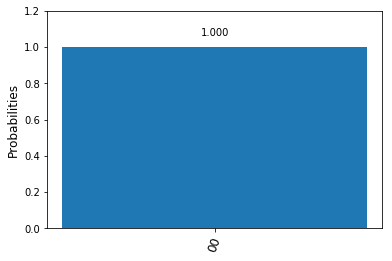

In [16]:
# Initialize circuit:
cnot_i_00 = QuantumCircuit(i_q, i_c, name="cnot_i_00") 
# Note: qubits are assumed by Qiskit
# to be initialized in the |0> state

# Apply gates according to diagram:
cnot_i_00.cx(i_q[0], i_q[1]) # Apply CNOT on line 2 controlled by line 1

# Measure final state:
cnot_i_00.measure(i_q[0], i_c[0]) # Write qubit 1 state onto classical ancilla bit 1
cnot_i_00.measure(i_q[1], i_c[1]) # Write qubit 2 state onto classical ancilla bit 2

# Display final state probabilities:
execute_and_plot(cnot_i_00)

*Note: The set of circuit operations to be executed can also be specified through a 'QASM', or a string that contains the registers and the set of operators to apply. We can get this string for the circuit we just made through the `.qasm()` method. This is also helpful for checking our implementation of the circuit, as we can read off the operations and make sure they match up with the diagram*

In [17]:
print(cnot_i_00.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg i_q[2];
creg i_c[2];
cx i_q[0],i_q[1];
measure i_q[0] -> i_c[0];
measure i_q[1] -> i_c[1];



Continuing input by input,

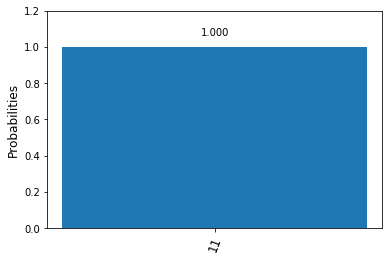

In [18]:
# Initialize circuit:
cnot_i_01 = QuantumCircuit(i_q, i_c, name="cnot_i_01")
cnot_i_01.x(i_q[0]) # Set the 1st qubit to |1> by flipping 
# the initialized |0> with an X gate before implementing
# the circuit 

# Apply gates according to diagram:
cnot_i_01.cx(i_q[0], i_q[1]) # Apply CNOT controlled by line 1

# Measure final state:
cnot_i_01.measure(i_q[0], i_c[0])
cnot_i_01.measure(i_q[1], i_c[1])

# Display final state probabilities:
execute_and_plot(cnot_i_01)

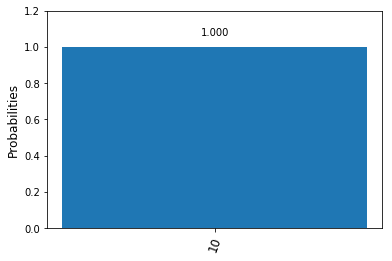

In [19]:
# Initialize circuit:
cnot_i_10 = QuantumCircuit(i_q, i_c, name="cnot_i_10")
cnot_i_10.x(i_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_i_10.cx(i_q[0], i_q[1]) # Apply CNOT controlled by line 1

# Measure final state:
cnot_i_10.measure(i_q[0], i_c[0])
cnot_i_10.measure(i_q[1], i_c[1])

# Display final state probabilities:
execute_and_plot(cnot_i_10)

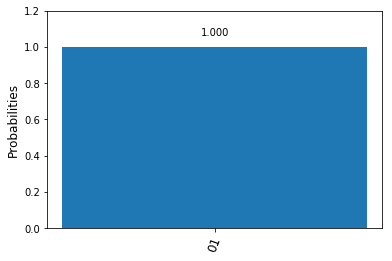

In [20]:
# Initialize circuit:
cnot_i_11 = QuantumCircuit(i_q, i_c, name="cnot_i_11")
cnot_i_11.x(i_q[0]) # Set the 1st qubit to |1>
cnot_i_11.x(i_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_i_11.cx(i_q[0], i_q[1]) # Apply CNOT controlled by line 1

# Measure final states:
cnot_i_11.measure(i_q[0], i_c[0])
cnot_i_11.measure(i_q[1], i_c[1])

# Display final state probabilities:
execute_and_plot(cnot_i_11)

Reading these off, we have $[\Psi = \left|00\right>,\left|10\right>,\left|01\right>,\left|11\right>]\rightarrow [\Psi' = \left|00\right>,\left|10\right>,\left|11\right>,\left|01\right>]$. 

Note that this is the same answer (up to convention in product-state notation) as obtained for approaches 1 and 2, only this time we have had a far less tedious time of writing out logic operations or matrices thanks to the Qiskit library abstracting much of this away for us. While the numpy library was helpful for making linear algebra operations, the matrices had to be user defined and this method does not have nearly the scalability or ease of computation that Qiskit offers.

## Circuit ii)

In [21]:
# For circuit ii, we can again create a quantum register of size 
# 2 with 2 classical ancilla bits for measurement

n = 2
ii_q = QuantumRegister(n, name="ii_q")
ii_c = ClassicalRegister(n, name="ii_c")

In [22]:
IBMQ.available_backends() #check backends - if you've set up your APIToken properly you
#should be able to see the quantum chips and simulators at IBM

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [23]:
for backend in IBMQ.available_backends(): #check backend status
    print(backend.name())
    pprint(backend.status())

ibmqx4
{'pending_jobs': 0, 'name': 'ibmqx4', 'operational': True}
ibmqx5
{'pending_jobs': 8, 'name': 'ibmqx5', 'operational': False}
ibmqx2
{'pending_jobs': 0, 'name': 'ibmqx2', 'operational': False}
ibmq_16_melbourne
{'pending_jobs': 6, 'name': 'ibmq_16_melbourne', 'operational': True}
ibmq_qasm_simulator
{'pending_jobs': 0, 'name': 'ibmq_qasm_simulator', 'operational': True}


Now for executing circuit ii):

In [25]:
# Initialize circuit:
cnot_ii_00 = QuantumCircuit(ii_q, ii_c, name="cnot_ii_00")
cnot_ii_01.x(ii_q[0])

# Apply gates according to diagram:

cnot_ii_00.h(ii_q) # Apply hadamards in parallel. 
# Note that specifying a register (rather than a qubit)
# for some gate method argument applies the gate to all
# qubits in the register
cnot_ii_00.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel.

# Measure final state:
cnot_ii_00.measure(ii_q[0], ii_c[0])
cnot_ii_00.measure(ii_q[1], ii_c[1])

# Display final state probabilities
execute_and_plot(cnot_ii_00)

NameError: name 'cnot_ii_01' is not defined

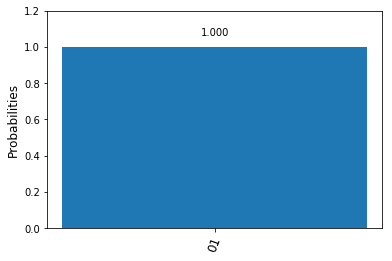

In [25]:
# Initialize circuit:
cnot_ii_01 = QuantumCircuit(ii_q, ii_c, name="cnot_ii_01")
cnot_ii_01.x(ii_q[0]) # Set the 1st qubit to |1>

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel
cnot_ii_01.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state:
cnot_ii_01.measure(ii_q[0], ii_c[0])
cnot_ii_01.measure(ii_q[1], ii_c[1])

# Display final state probabilities:
execute_and_plot(cnot_ii_01)

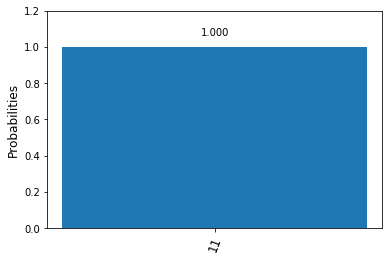

In [26]:
# Initialize circuits
cnot_ii_10 = QuantumCircuit(ii_q, ii_c, name="cnot_ii_10")
cnot_ii_10.x(ii_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel
cnot_ii_10.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state:
cnot_ii_10.measure(ii_q[0], ii_c[0])
cnot_ii_10.measure(ii_q[1], ii_c[1])

# Display final state probabilities:
execute_and_plot(cnot_ii_10)

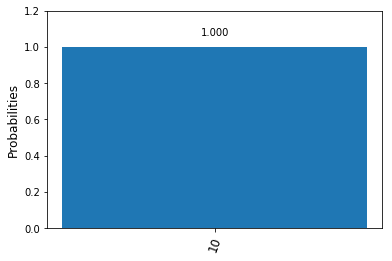

In [27]:
# Initialize circuits:
cnot_ii_11 = QuantumCircuit(ii_q, ii_c, name="cnot_ii_11")
cnot_ii_11.x(ii_q[0]) # Set the 1st qubit to |1>
cnot_ii_11.x(ii_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel
cnot_ii_11.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state
cnot_ii_11.measure(ii_q[0], ii_c[0])
cnot_ii_11.measure(ii_q[1], ii_c[1])

# Display final state probabilities
execute_and_plot(cnot_ii_11)

Reading off the computed final state, we see that it matches the computed final state of i), and so the circuits are considered equivalent $\square$.

<hr>

### Another implementation:

The input-by-input approach is helpful for first steps in understanding Qiskit, but is also more long-winded than necessary. For a solution to the problem that uses Qiskit more concisely/cleverly:

In [28]:
def circuit_i():
    i_q = QuantumRegister(2, name='i_q')
    i_c = ClassicalRegister(2, name='i_c')
    initial_states = ['00','01','10','11']
    initial_circuits = {state: QuantumCircuit(i_q, i_c, name='%s'%(state)) \
                       for state in initial_states}
    final_circuits = {}
    for state in initial_states:
        if state[0] is '1':
            initial_circuits[state].x(i_q[0])
        if state[1] is '1':
            initial_circuits[state].x(i_q[1])
            
        initial_circuits[state].cx(i_q[0], i_q[1]) 
        
        initial_circuits[state].measure(i_q[0], i_c[0])
        initial_circuits[state].measure(i_q[1], i_c[1])
        final_circuits[state] = initial_circuits[state]
    return initial_circuits

In [29]:
def circuit_ii():
    ii_q = QuantumRegister(2, name='ii_q')
    ii_c = ClassicalRegister(2, name='ii_c')
    initial_states = ['00','01','10','11']
    circuits = {state: QuantumCircuit(ii_q, ii_c, name='%s'%(state)) \
                       for state in initial_states}
    for state in initial_states:
        if state[0] is '1':
            circuits[state].x(ii_q[0])
        if state[1] is '1':
            circuits[state].x(ii_q[1])
            
        circuits[state].h(ii_q)
        circuits[state].cx(ii_q[1], ii_q[0])
        circuits[state].h(ii_q)
        
        circuits[state].measure(ii_q[0], ii_c[0])
        circuits[state].measure(ii_q[1], ii_c[1])
    return circuits

In [30]:
i = circuit_i()
ii = circuit_ii()

In [36]:
# Use the IBMQ Quantum Experience
backend = least_busy(IBMQ.backends())

# Use local qasm simulator
# backend = Aer.get_backend('qasm_simulator')

results_i = execute(list(i.values()), backend=backend).result()
results_ii = execute(list(ii.values()), backend=backend).result()

In [37]:
results_i_mapping = {circuit: results_i.get_counts(circuit) for circuit in list(results_i.get_names())}
results_ii_mapping = {circuit: results_ii.get_counts(circuit) for circuit in list(results_ii.get_names())}

In [38]:
print(results_i_mapping)
print(results_ii_mapping)

{'00': {'00': 941, '01': 29, '10': 41, '11': 13}, '01': {'00': 101, '01': 15, '10': 865, '11': 43}, '10': {'00': 25, '01': 76, '10': 116, '11': 807}, '11': {'00': 143, '01': 835, '10': 21, '11': 25}}
{'00': {'00': 957, '01': 33, '10': 25, '11': 9}, '01': {'00': 94, '01': 16, '10': 886, '11': 28}, '10': {'00': 30, '01': 85, '10': 129, '11': 780}, '11': {'00': 125, '01': 852, '10': 23, '11': 24}}


results_i


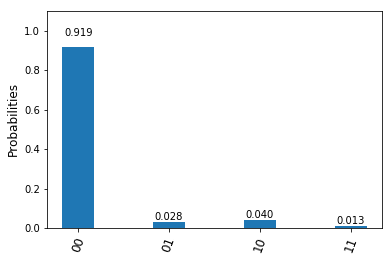

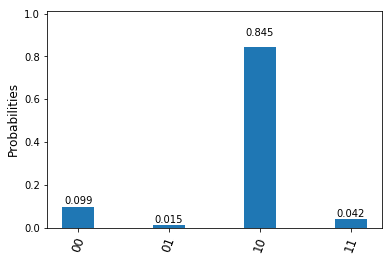

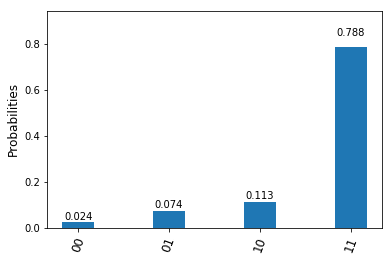

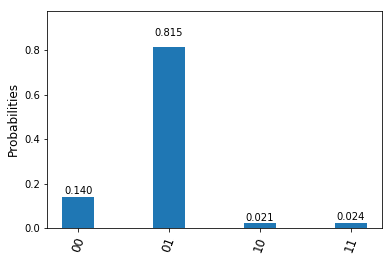

In [39]:
print('results_i')
for circuit in list(results_i.get_names()):
    plot_histogram(results_i.get_counts(circuit))

results_ii


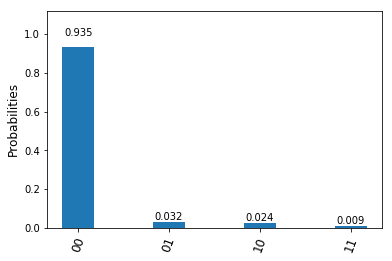

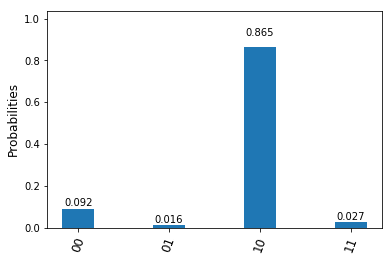

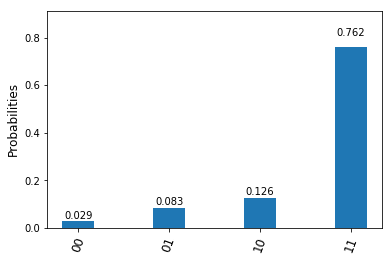

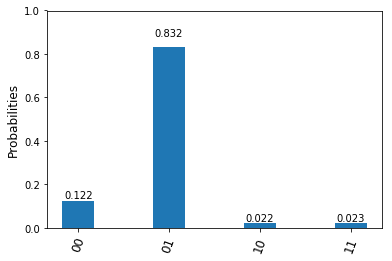

In [40]:
print('results_ii')
for circuit in list(results_ii.get_names()):
    plot_histogram(results_ii.get_counts(circuit))

$\square$.

# Appendix:

### Next steps:

Thank you for reading through this tutorial! The author hopes that it has been a helpful experience in getting started with Qiskit and quantum circuitry. For moving forward, consider the following projects:
   - Edit this notebook such that it can run on an actual quantum chip! By looking at the documentation/configuration of backends either online or through the `IBMQ.get_backend('backend_name').configuration()` method, you can find the connectivity map and then set up a circuit implementation that satisfies the 2-qubit gate constraints from this connectivity map. I strongly recommend this, as this is a vital step to using the coolest feature of Qiskit, which is interfacing with actual quantum backends.
   - Implement an entirely different circuit.
   - Try generating circuits by uploading QASM strings.
   - Follow through with the provided tutorial files on the Qiskit GitHub
   - Look through the provided further readings in the appendix notebook.
 

### Further reading

While this tutorial aims to introduce the quantum computational focus topic of reading and evaluating circuit diagrams as best as it can, there is still a wealth of literature beyond this point that ought to be read by those who are intrigued by the subject. The internet is rife with hype (understandably so) about the subject that can obscure source-finding, so here are some pointers:

 - Quantum Computing Explained, D. McMahon (hardcover text, a good starting point for those without much physics background)
 - Quantum Computation and Quantum Information (10th Anniversary Edition), M. A. Nielsen and I. L. Chuang (pdf available online, really good monograph on theory and experimental realization of quantum computation)
 - Principles of Quantum Mechanics, R. Shankar (physics textbook for background in quantum mechanics)
 - Introduction to Quantum Mechanics, D. Griffiths (physics textbook for background in quantum mechanics)
